# K Means and K Medoids












In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pylab as plt




## Data Cleaning, Processing


In [2]:
def get_data(filename,class_column):
    """
        Returns train_df , val_df, test_df , dict_map
        filename     : Relative filename of the directory
        class_column : Name of the class column
        ratio        : train_ratio
    """
    
    df = pd.read_csv(filename,header=None)
    train = { 'x' : []  }

    classes  = df[class_column].unique().tolist()
    dict_map = dict(enumerate(classes))
    
    for index,clss in dict_map.items():
        
        clss_df = df[df[class_column] == clss].sample(frac=1)
        clss_df = clss_df.drop(columns=class_column)
        n_rows = len(clss_df) 
        train['x'].append(clss_df.iloc[0 : n_rows].values.reshape(-1,4))     
    
    train['x'] = np.concatenate(train['x'])

    return train

def get_fake_data():
    
    train = dict()
    train['x'] = np.array([ [100,5],
                            [90,7],
                            [15,96],
                            [20,105],
                            [85,12],
                            [18,110],
                            [1000,1000]
                         ])
    
    return train
    

In [3]:
train_iris = get_data("iris.data",4)
train_fake = get_fake_data()


## K - Means

In [4]:
class K_Means:

    def __init__(self,data,k):
        self.data = data
        self.k = k
        index = np.random.choice(data.shape[0],k)
        self.centroids = self.data[index]
        self.data_clss = np.random.randint(0,high = k-1,size=(data.shape[0]))
        
    def get_distortion(self,kth_cls,centroid):
        
        cluster_points = self.data[kth_cls == self.data_clss]
        distortion = ((cluster_points - centroid)**2).sum(axis=-1).sum()
        return distortion
        
        
    def train(self,no_iters):
        
        distortion = None
        for i in range(no_iters):
            distances = np.sqrt(((self.data[:,np.newaxis] - self.centroids)**2).sum(axis=-1))
            self.data_clss = np.argmin(distances,axis=-1)
            
            centroid = []
            distortions = []
            for kth_cls in range(self.k):
                centroid.append(self.data[kth_cls == self.data_clss].mean(axis=0))
                distortions.append(self.get_distortion(kth_cls,centroid[kth_cls]))
            
            distortion = np.array(distortions)
            self.centroids = np.array(centroid)
        
        return distortion.sum()
        
    def predict(self,test_point):
        
        distance = np.sqrt((((self.centroid-test_point)**2).sum(axis=-1)))
        clss = np.argmin(distance,axis=-1)
        return clss


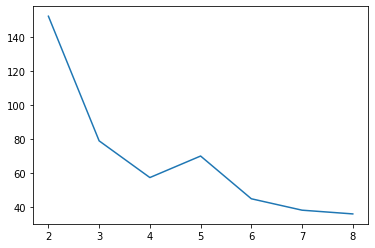

In [17]:
distortions = list()
for k in range(2,9):

    k_means = K_Means(train_iris['x'],k)
    distortion = k_means.train(10)
    distortions.append(distortion)
plt.plot([2,3,4,5,6,7,8],distortions)


# K Medioid

In [6]:
class K_Medioid:

    def __init__(self,data,k):
        self.data = data
        self.k = k
        index = np.random.choice(data.shape[0],k)
        self.medioids = self.data[index]
        self.data_clss = np.random.randint(0,high = k-1,size=(data.shape[0]))
        
    def get_distortion(self,kth_cls,medioid):
        
        cluster_points = self.data[kth_cls == self.data_clss]
        distortion = ((cluster_points - medioid)**2).sum(axis=-1).sum()
        return distortion
        
        
    def train(self,no_iters):
        
        distortion_old = np.finfo(np.float64).max
        distortion_new = None
        for i in range(no_iters):
            distances = np.sqrt(((self.data[:,np.newaxis] - self.centroids)**2).sum(axis=-1))
            self.data_clss = np.argmin(distances,axis=-1) 
            
            distortion_new = 0
            for kth_cls in range(self.k):
                distortion_new += self.get_distortion(kth_cls,self.medioid[kth_cls])
            
            if distortion_new < distortion_old:
                break
            
            self.index = np.random.choice(self.data.shape[0],k)
            self.medioids = self.data[index]
            distortion_old = distortion_new
        
        return distortion_new
        
    def predict(self,test_point):
        
        distance = np.sqrt((((self.medioids-test_point)**2).sum(axis=-1)))
        clss = np.argmin(distance,axis=-1)
        return clss


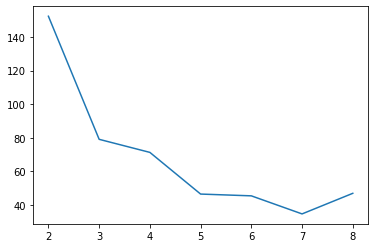

In [7]:
distortions = list()
for k in range(2,9):

    k_means = K_Means(train_iris['x'],k)
    distortion = k_means.train(10)
    distortions.append(distortion)
plt.plot([2,3,4,5,6,7,8],distortions)